In [1]:
import numpy as np 
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

# Get Data



In [2]:
data=pd.read_csv("housing.csv")

## Data Ingestion

In [3]:
data.shape

(20640, 10)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
# as I see above, we have ten columns 
# The output column is the median_house_value

# There are some observations I can see:
# 1) The first thing I observe that all columns have 20640 entries except total_bedrooms which have 20433
#    that means there are 207 missing values
# 2) the second thing is that all columns are numerical fields except ocean_proximity which is object field
#    object field can be many options and not necesserily text.

In [6]:
data.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [7]:
# 3) Since the data source is a data table (csv) consists of numbers and texts. So, the object field is text field.
# 4) By looking at the values of "Ocean_proximity" we can see that has frequent values, that means that the values are categories.
#    So, the ocean_proximity field is mostly a categorial attribute. To make sure, I will write the next code line.


In [8]:
data["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [9]:
# as I see above, the ocean_proximity field is categorial field. It consists of 5 categories which are (1H Ocean, Inland,
#  Near Ocean, Near Bay, Island)
# if I sum these categories counts I will get 20640

In [10]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [11]:
# as I observe from the table above:
# 1) the describe method only gives me a statistical summary for the 9 numerical attributes and not for object fields.
# 2) The statistical funcions applies only on numerical values. So, any null values will be excluded.
#    for example, the total_bedrooms has some null values. So, these null values will not be calculated in the 
#    statistical funcions. For example, the count function doesn't count the null values in the total_bedrooms field.
#    it only gives 20433 because it didn't count null values.

# 3) eg. To get a clear idea about the first quartile, third quartile and the mean, we can see (for the housing_media_age)
#    that 25% of the total houses(20640) is less than 18 years old; and 50% is less than 29 years old; and 75% is less than 37.


In [12]:
# Now, I want to see the distributions for all numerical attributes. I will use histogram with bins=20

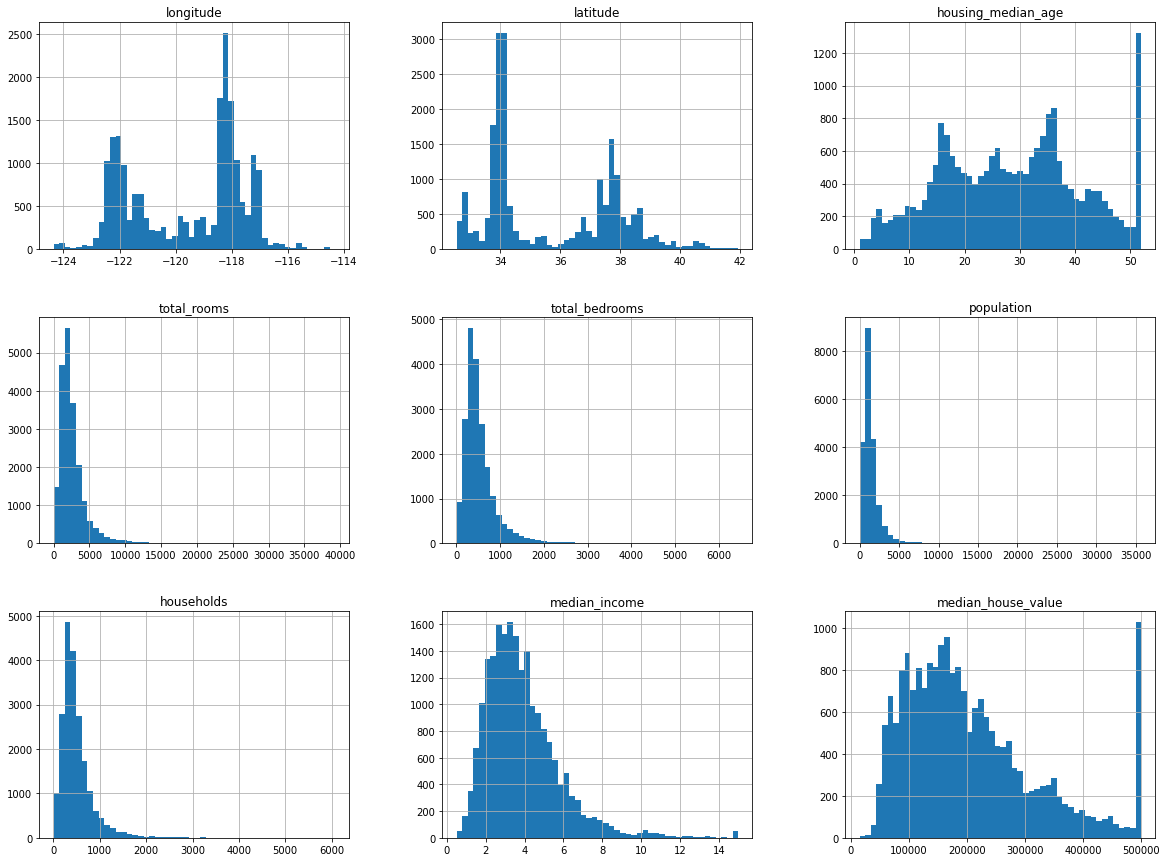

In [13]:
data.hist(bins=50, figsize=(20,15))
#save_fig("attribute_histogram_plots")
plt.show()

In [14]:
# as I see in the histogram of housing_median_value for example, there is more than 1200 instances have price around 500000 $

## Separating the Test Set  (20%)

In [15]:
# Test data=0.2*20640=4128 instances

# Why I isolate the Test Set early?
# Isolating Test Set from early will help to know some patterns in the Test Set that may help us to choose the model.

# The main objective of separating test set and training set is to reduce the generelization error or overfitting
# So, we want to reduce the error percentage as much as possible for both training set and test set. That relies on the model
# which we will use.

In [16]:
# Stead the training set and not mixing it with Test Set every time we run ther kernal.
np.random.seed(42)

# shuffle the whole data set instances
shuffled_indices = np.random.permutation(len(data))  

# Specify the size of Test Set
test_set_size = int(len(data) *0.2)

# Indicate the Test Set
test_indices = shuffled_indices[:test_set_size]

# Indicate the Training Set which is the rest of data set
train_indices = shuffled_indices[test_set_size:]


train_set,test_set=data.iloc[train_indices], data.iloc[test_indices]
print(len(train_set), "train +", len(test_set), "test")


16512 train + 4128 test


### Create Test set based on the attribute that has the most impact on target feature (median_income)

In [17]:
# Since the median_income is continuous numerical attribute, I need to convert it into categorical attribute by:
# 1) Create a new column 'income_cat' which is categorical attribute
# 2) reduce the number of stratums (categories) in the median_income fiels by dividing them on 1.5
# 3) round the decimal values of categories to the nearest integer number in order to make discrete categories
data['income_cat']=np.ceil(data['median_income']/1.5)

In [18]:
# 4) In order to make each stratum has enough entries; we will merge all values more than 5 
 #   into the category of 5 because those values have low entries.
data['income_cat'].where(data['income_cat']<5,5,inplace=True)

In [19]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3.0


In [20]:
#as we can see above, we could create a new field has categories from 1 to 5 without decimal 

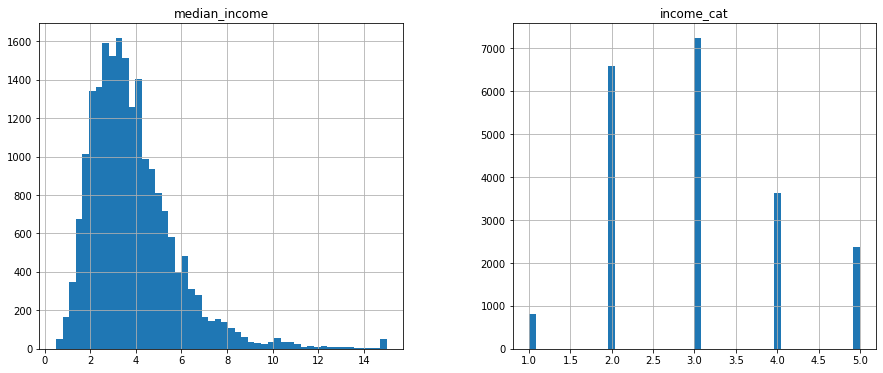

In [21]:
data[['median_income','income_cat']].hist(bins=50,figsize=(15,6))
plt.show()

In [22]:
# as we can see above the entries of 5 in left graph =800 but on the right graph =2200
# because we merge all the values after 5 into the 5 stratum

In [23]:
from sklearn.model_selection import StratifiedShuffleSplit

In [24]:
split=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index,test_index in split.split(data,data['income_cat']):
    strat_train_set=data.loc[train_index]
    strat_test_set=data.loc[test_index]

#### Check how much each category represents in the whole dataset and how much they represent in the test set

In [25]:
data['income_cat'].value_counts()/len(data)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

In [26]:
strat_test_set['income_cat'].value_counts()/len(strat_test_set)

3.0    0.350533
2.0    0.318798
4.0    0.176357
5.0    0.114583
1.0    0.039729
Name: income_cat, dtype: float64

##### as we can see above, each category represents similar values in both data set and test set

### after we create the test set successfully, we will drop the income_cat that we created

In [27]:
for set in (strat_test_set,strat_train_set):
    set.drop(['income_cat'],axis=1,inplace=True)

In [28]:
strat_train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN


In [29]:
strat_test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
5241,-118.39,34.12,29.0,6447.0,1012.0,2184.0,960.0,8.2816,500001.0,<1H OCEAN
10970,-117.86,33.77,39.0,4159.0,655.0,1669.0,651.0,4.6111,240300.0,<1H OCEAN
20351,-119.05,34.21,27.0,4357.0,926.0,2110.0,876.0,3.0119,218200.0,<1H OCEAN
6568,-118.15,34.20,52.0,1786.0,306.0,1018.0,322.0,4.1518,182100.0,INLAND
13285,-117.68,34.07,32.0,1775.0,314.0,1067.0,302.0,4.0375,121300.0,INLAND


# Discover and visualize the data to gain insights and patterns


In [30]:
data=train_set.copy()

#### Since there is a geographical information (latitude and longitude), it is good idea to create a scatter plot of all districts to visualize the data


<AxesSubplot:xlabel='longitude', ylabel='latitude'>

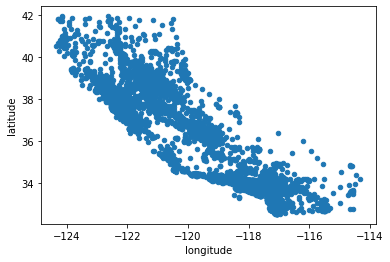

In [31]:
# as long as we have geographical information(longitude & latitude), we will use scatter plot
data.plot(kind="scatter", x="longitude", y="latitude")

In [32]:
# as we can see above, the plot looks like California map

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

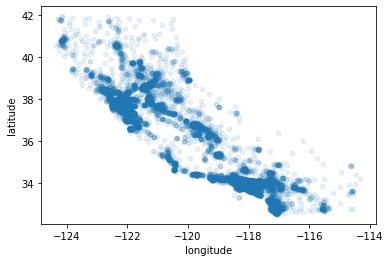

In [33]:
# To see the intensity of the houses and their places 
data.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

#### by comparing the plot with California map, I see that places near the bay, Los Angeles and Fresno have high intensity 

### Now, lets look at the housing prices:
    

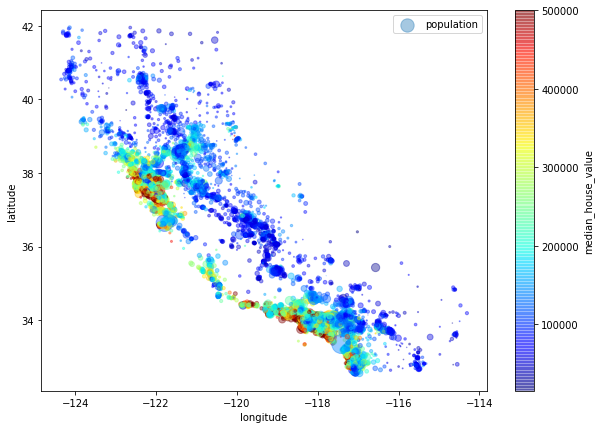

In [34]:
data.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=data["population"]/100, label="population", figsize=(10,7),
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.legend()
plt.savefig("housing_prices_scatterplot")

The raduis of each circle represents the district population 
The color represents the price.

the image above tells us that the houses prices are very much related to the location (e.g. close to the ocean) and to the 
         population density as we probably know already

## Looking for correlations between attributes to know the attributes that have most impact on the target feature

In [35]:
# to know the correlations between the attributes
corr_matrix = data.corr()

In [36]:
# To see how much every attribute corrrelated with the target feature (median_house_value)
corr_matrix["median_house_value"].sort_values(ascending=False)


median_house_value    1.000000
median_income         0.690647
total_rooms           0.133989
housing_median_age    0.103706
households            0.063714
total_bedrooms        0.047980
population           -0.026032
longitude            -0.046349
latitude             -0.142983
Name: median_house_value, dtype: float64

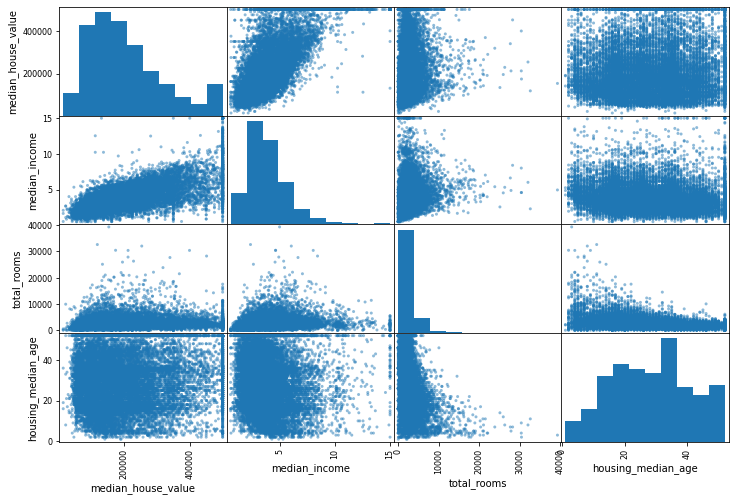

In [37]:
# lets visualize the corrleations between the target attribute and the most correlated with it
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(data[attributes], figsize=(12, 8))
plt.savefig("scatter_matrix_plot")

as we can see, there is linear correlation between house_value and median_income

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

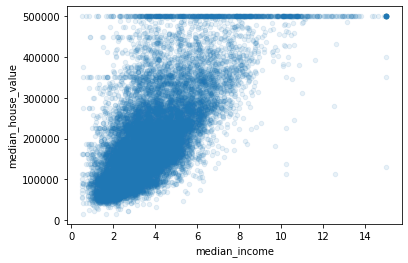

In [38]:
data.plot(kind='scatter',x='median_income',y='median_house_value',alpha=0.1)

### Attributes Combination to find correlation with the target attribute

In [39]:
# lets combine some features together to find correlations with house_value
data["rooms_per_household"] = data["total_rooms"]/data["households"]
data["bedrooms_per_room"] = data["total_bedrooms"]/data["total_rooms"]
data["population_per_household"]=data["population"]/data["households"]

Now, lets see the correlations

In [40]:
corr_matrix = data.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.690647
rooms_per_household         0.158485
total_rooms                 0.133989
housing_median_age          0.103706
households                  0.063714
total_bedrooms              0.047980
population_per_household   -0.022030
population                 -0.026032
longitude                  -0.046349
latitude                   -0.142983
bedrooms_per_room          -0.257419
Name: median_house_value, dtype: float64

<AxesSubplot:xlabel='bedrooms_per_room', ylabel='median_house_value'>

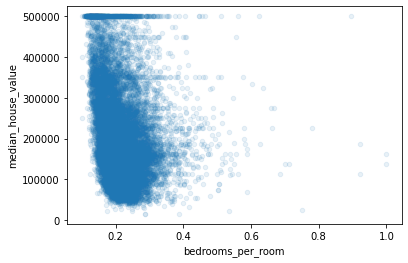

In [41]:
data.plot(kind='scatter',x='bedrooms_per_room',y='median_house_value',alpha=0.1)

as I can see above, the attributions combination of bedrooms_per_room has a big negative impact on the median_house_value

In [42]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
count,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,-119.582290,35.643149,28.608285,2642.004784,538.496851,1426.453004,499.986919,3.880754,207194.693738,5.435235,0.212858,3.096961
std,2.005654,2.136665,12.602499,2174.646744,419.007096,1137.056380,380.967964,1.904294,115622.626448,2.387375,0.057995,11.578744
min,-124.350000,32.550000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.888889,0.100000,0.692308
25%,-121.810000,33.930000,18.000000,1454.000000,296.750000,789.000000,280.000000,2.566700,119800.000000,4.452055,0.175178,2.428799
50%,-118.510000,34.260000,29.000000,2129.000000,437.000000,1167.000000,410.000000,3.545800,179850.000000,5.235874,0.202808,2.817240
75%,-118.010000,37.720000,37.000000,3160.000000,647.000000,1726.000000,606.000000,4.773175,265125.000000,6.061037,0.239501,3.280000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,141.909091,1.000000,1243.333333


## Prepare the data for the ML algorithms

Specifying the input (predictors) and the output (desired) features

In [43]:
data = strat_train_set.drop("median_house_value", axis=1) # drop labels for training set
data_labels = strat_train_set["median_house_value"].copy()

I will make automatic transformers so I can use it in other projects too

### Data Cleaning

#### Missing values

I will showcase the three options that I can do to handle missing values in bedrooms_total feature

In [44]:
data.dropna(subset=["total_bedrooms"])    # option 1 (delete the rows with missing values)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,<1H OCEAN
...,...,...,...,...,...,...,...,...,...
6563,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312,INLAND
12053,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682,INLAND
13908,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723,INLAND
11159,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625,<1H OCEAN


In [45]:
data.drop("total_bedrooms", axis=1)       # option 2 (drop the field)


,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,710.0,339.0,2.7042,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,306.0,113.0,6.4214,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,936.0,462.0,2.8621,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,1460.0,353.0,1.8839,INLAND
3555,-118.59,34.23,17.0,6592.0,4459.0,1463.0,3.0347,<1H OCEAN
...,...,...,...,...,...,...,...,...
6563,-118.13,34.20,46.0,1271.0,573.0,210.0,4.9312,INLAND
12053,-117.56,33.88,40.0,1196.0,1052.0,258.0,2.0682,INLAND
13908,-116.40,34.09,9.0,4855.0,2098.0,765.0,3.2723,INLAND
11159,-118.01,33.82,31.0,1960.0,1356.0,356.0,4.0625,<1H OCEAN


In [46]:
median = data["total_bedrooms"].median()
data["total_bedrooms"].fillna(median, inplace=False) # option 3
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,<1H OCEAN
...,...,...,...,...,...,...,...,...,...
6563,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312,INLAND
12053,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682,INLAND
13908,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723,INLAND
11159,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625,<1H OCEAN


In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 17606 to 15775
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16354 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   ocean_proximity     16512 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


Or we can also use built in library in sk-learn which is easier and can be applied to all features at once

In [48]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

Remove the text attribute because median can only be calculated on numerical attributes:

In [49]:
data_num = data.drop('ocean_proximity', axis=1)

In [50]:
imputer.fit(data_num)

SimpleImputer(strategy='median')

In [51]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

as we can see above, sklearn could calculate the median for all numeric attributes
I may need that because we may face missing values in the future and we need to fill them with median values

Now, Transform the training set:

In [52]:
X = imputer.transform(data_num)

X represents the numerical columns values as numpy array

In [53]:
X

array([[-121.89  ,   37.29  ,   38.    , ...,  710.    ,  339.    ,
           2.7042],
       [-121.93  ,   37.05  ,   14.    , ...,  306.    ,  113.    ,
           6.4214],
       [-117.2   ,   32.77  ,   31.    , ...,  936.    ,  462.    ,
           2.8621],
       ...,
       [-116.4   ,   34.09  ,    9.    , ..., 2098.    ,  765.    ,
           3.2723],
       [-118.01  ,   33.82  ,   31.    , ..., 1356.    ,  356.    ,
           4.0625],
       [-122.45  ,   37.77  ,   52.    , ..., 1269.    ,  639.    ,
           3.575 ]])

We can put the array of X into a table

In [54]:
data_tr = pd.DataFrame(X, columns=data_num.columns)
data_tr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042
1,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214
2,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621
3,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839
4,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347
...,...,...,...,...,...,...,...,...
16507,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312
16508,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682
16509,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723
16510,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625


In [55]:
data_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
dtypes: float64(8)
memory usage: 1.0 MB


as we can see above, we filled the missing values of total_bedrooms column

#### Categorical attributes

Now let's process the categorical input feature, ocean_proximity:

In [56]:
data_cat = data[['ocean_proximity']]
data_cat.head(10)

,ocean_proximity
17606,<1H OCEAN
18632,<1H OCEAN
14650,NEAR OCEAN
3230,INLAND
3555,<1H OCEAN
19480,INLAND
8879,<1H OCEAN
13685,INLAND
4937,<1H OCEAN
4861,<1H OCEAN


In [57]:
from sklearn.preprocessing import OrdinalEncoder

In [58]:
ordinal_encoder = OrdinalEncoder()
data_cat_encoded = ordinal_encoder.fit_transform(data_cat)
data_cat_encoded[:10]

array([[0.],
       [0.],
       [4.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.]])

In [59]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

We could convert the categorical feature to numbers. However, this may causes a confusion to the ML algorithm because it could be considered that the class of 0 and class 1 are near from each other because the numbers 0 & 1 are closed to each other.

To solve this problem, I wil convert the each value of (ocean_proximity) into binary attribute by using One Hot coding method.

In [60]:
from sklearn.preprocessing import OneHotEncoder

In [61]:
cat_encoder = OneHotEncoder(sparse=False)
data_cat_1hot = cat_encoder.fit_transform(data_cat)
data_cat_1hot

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [62]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

### Attributes Combination

In [63]:
data_tr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042
1,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214
2,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621
3,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839
4,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347
...,...,...,...,...,...,...,...,...
16507,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312
16508,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682
16509,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723
16510,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625


In [64]:
rooms_per_household = X[:, 3] / X[:, 6]
population_per_household = X[:, 5] / X[:, 6]
bedrooms_per_room = X[:, 4] / X[:, 3]

In [65]:
data_extra_attribs=np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
data_extra_attribs.shape

(16512, 11)

In [66]:
data_extra_attribs = pd.DataFrame(
    data_extra_attribs,
    columns=list(data_tr.columns)+["rooms_per_household", "population_per_household","bedrooms_per_room"],
    index=data.index)


In [67]:
data_extra_attribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,population_per_household,bedrooms_per_room
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,4.625369,2.094395,0.223852
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,6.008850,2.707965,0.159057
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,4.225108,2.025974,0.241291
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,5.232295,4.135977,0.200866
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,4.505810,3.047847,0.231341


In [68]:
data_extra_attribs.shape

(16512, 11)

In [69]:
data_extra_attribs.shape

(16512, 11)

### Feature Scaling

The ML algorithm will not perform good if the scales of the numeric features are different

I have two ways to do feature scaling:
1- Max-Min Scaling (Normalization).
2-Standardization

Max-Min Scaling way is good for some ML algorithms such as Neural Network which requires the range between 0 & 1
   but it could be not good with outliers. However, standardization way could be good for outliers values because it does not affected by outliers

In [70]:
from sklearn.preprocessing import StandardScaler

In [71]:
scaler=StandardScaler()

data_extra_attribs_scaled=scaler.fit(data_extra_attribs.values)
data_extra_attribs_scaled=scaler.transform(data_extra_attribs.values)

In [72]:
data_extra_attribs_scaled

array([[-1.15604281,  0.77194962,  0.74333089, ..., -0.31205452,
        -0.08649871,  0.15531753],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.21768338,
        -0.03353391, -0.83628902],
       [ 1.18684903, -1.34218285,  0.18664186, ..., -0.46531516,
        -0.09240499,  0.4222004 ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.3469342 ,
        -0.03055414, -0.52177644],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.02499488,
         0.06150916, -0.30340741],
       [-1.43579109,  0.99645926,  1.85670895, ..., -0.22852947,
        -0.09586294,  0.10180567]])

In [73]:
data_prepared=np.c_[data_extra_attribs_scaled,data_cat_1hot]
data_prepared

array([[-1.15604281,  0.77194962,  0.74333089, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43579109,  0.99645926,  1.85670895, ...,  0.        ,
         1.        ,  0.        ]])

In [74]:
data_prepared.shape

(16512, 16)

## Select and train a model

### Linear Regression Model

In [75]:
from sklearn.linear_model import LinearRegression

In [76]:
lin_reg = LinearRegression()
lin_reg.fit(data_prepared, data_labels)

LinearRegression()

In [77]:
from sklearn.metrics import mean_squared_error

In [78]:
data_predictions = lin_reg.predict(data_prepared)
lin_mse = mean_squared_error(data_labels, data_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68628.19819848923

As we can see above, the error percentage is very high. This is because of underfitting.
Underfitting happens because some reasons:
Either the type of model is not suitable with the problem nature.
or the features are not enough. Therefore, I will choose a model that is more complex to fit with the data becuase we can not use Regularization with the linear regression model.

### Decision Tree Model

In [79]:
from sklearn.tree import DecisionTreeRegressor

In [80]:
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(data_prepared, data_labels)

DecisionTreeRegressor(random_state=42)

In [81]:
data_predictions = tree_reg.predict(data_prepared)
tree_mse = mean_squared_error(data_labels, data_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

As we can see from the result above, we got zero error which could be overfitting. Therefore, we need to make sure about the performance of this model before we apply it on test set. So, we will create validation set which is a part of training set to validate the model performance by using Cross Validation before we apply it on the test set.

### Cross Validation for the Decission Tree Model

In [82]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, data_prepared, data_labels, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [83]:
print("Scores:", tree_rmse_scores)
print("Mean:", tree_rmse_scores.mean())

Scores: [70194.33680785 66855.16363941 72432.58244769 70758.73896782
 71115.88230639 75585.14172901 70262.86139133 70273.6325285
 75366.87952553 71231.65726027]
Mean: 71407.68766037929


As we can see here, the mean of rmse for the validation folds is very high which mean we have overfitting situation for sure.

### Random Forest Model

In [84]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(data_prepared, data_labels)

RandomForestRegressor(random_state=42)

In [85]:
data_predictions = forest_reg.predict(data_prepared)
forest_mse = mean_squared_error(data_labels, data_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

18603.515021376355

As we can see above, the result is very good compared to the results of the other models. Now, we will use cross validation to make sure that it is not overfitting.

### Cross Validation for the Random Forest Model

In [86]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(forest_reg, data_prepared, data_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-scores)


In [87]:
print("Scores:", forest_rmse_scores)
print("Mean:", forest_rmse_scores.mean())

Scores: [49519.80364233 47461.9115823  50029.02762854 52325.28068953
 49308.39426421 53446.37892622 48634.8036574  47585.73832311
 53490.10699751 50021.5852922 ]
Mean: 50182.303100336096


As we can see above, the mean of rmse for the cross validation is 50182 which means we have amount of overfitting. However, its the best model so far.

### SVM Model

In [95]:
from sklearn.svm import SVR

svm_reg = SVR(kernel="linear")
svm_reg.fit(data_prepared, data_labels)
data_predictions = svm_reg.predict(data_prepared)
test_data=data_prepared
svm_mse = mean_squared_error(data_labels, data_predictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

111094.6308539982

The error percentage of SVM is very high. So, the best model among those four models is Random Forest algorithm.

## Fune Tune the model

After we selected the best medel, we can do fine tune to get the best combination of parameters and its values by using Grid Search

In [96]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # it will try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then it will try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)

#  and the train across are 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(data_prepared, data_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

To see the best parameters combination that grid search found:

In [97]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [98]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

63669.11631261028 {'max_features': 2, 'n_estimators': 3}
55627.099719926795 {'max_features': 2, 'n_estimators': 10}
53384.57275149205 {'max_features': 2, 'n_estimators': 30}
60965.950449450494 {'max_features': 4, 'n_estimators': 3}
52741.04704299915 {'max_features': 4, 'n_estimators': 10}
50377.40461678399 {'max_features': 4, 'n_estimators': 30}
58663.93866579625 {'max_features': 6, 'n_estimators': 3}
52006.19873526564 {'max_features': 6, 'n_estimators': 10}
50146.51167415009 {'max_features': 6, 'n_estimators': 30}
57869.25276169646 {'max_features': 8, 'n_estimators': 3}
51711.127883959234 {'max_features': 8, 'n_estimators': 10}
49682.273345071546 {'max_features': 8, 'n_estimators': 30}
62895.06951262424 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54658.176157539405 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59470.40652318466 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52724.9822587892 {'bootstrap': False, 'max_features': 3, 'n_estimators'

As we can see above, the best parameters combinations happen when the max_features=8 and the n_estimators=30,, we get 49682.27
last notice that the grid search can also handle outliers.